<a href="https://colab.research.google.com/github/won195/TIL/blob/master/unpivot_%2B_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

df1 = pd.read_excel('/content/drive/MyDrive/python/데이터스테이션/data/D00EXAMPLE.xlsx').set_index('노래')
df1

,A,B,C,D,E
노래,,,,,
이효리,6,9,7,6,6
양현석,8,9,7,10,9
이승철,10,10,9,6,9
서인영,10,7,7,9,7
김범수,8,9,8,10,8


In [9]:
udf1 = df1.stack().reset_index()
udf1.columns = ['심사자','참가자','점수']
udf1

,심사자,참가자,점수
0,이효리,A,6
1,이효리,B,9
2,이효리,C,7
3,이효리,D,6
4,이효리,E,6
5,양현석,A,8
6,양현석,B,9
7,양현석,C,7
8,양현석,D,10
9,양현석,E,9


In [10]:
df2 = pd.read_excel('/content/drive/MyDrive/python/데이터스테이션/data/D00EXAMPLE.xlsx', sheet_name=3)
df2

,심사자,성별
0,이효리,여
1,양현석,남
2,이승철,남
3,서인영,여
4,김범수,남


In [12]:
pdf1 = udf1.merge(df2, how='left')
pdf1

,심사자,참가자,점수,성별
0,이효리,A,6,여
1,이효리,B,9,여
2,이효리,C,7,여
3,이효리,D,6,여
4,이효리,E,6,여
5,양현석,A,8,남
6,양현석,B,9,남
7,양현석,C,7,남
8,양현석,D,10,남
9,양현석,E,9,남


In [14]:
pdf1 = pdf1.pivot_table('점수', columns='성별', index='참가자', aggfunc='mean')
pdf1#.to_clipboard()

성별,남,여
참가자,,
A,8.666667,8.0
B,9.333333,8.0
C,8.000000,7.0
D,8.666667,7.5
E,8.666667,6.5


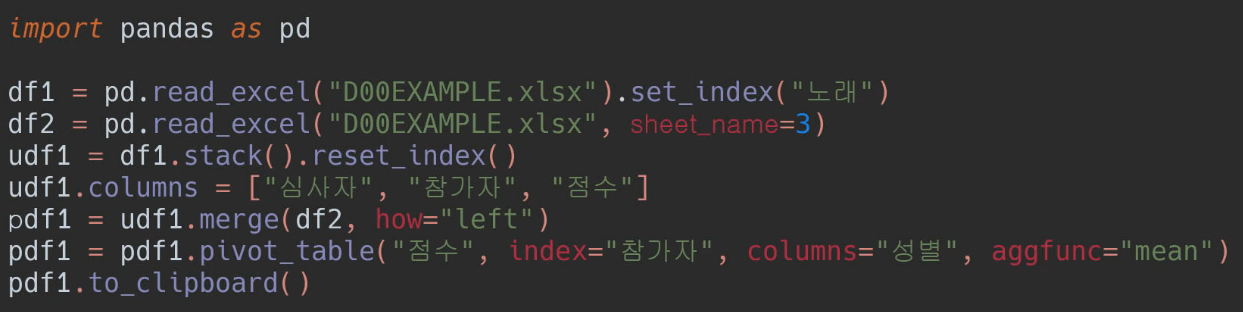